In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('customer_bookings.csv', encoding='utf-8')

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
print(df.describe())

       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%

In [6]:
df.describe(include=[object])

,sales_channel,trip_type,flight_day,route,booking_origin
count,50000,50000,50000,50000,50000
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44382,49497,8102,2680,17872


In [7]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

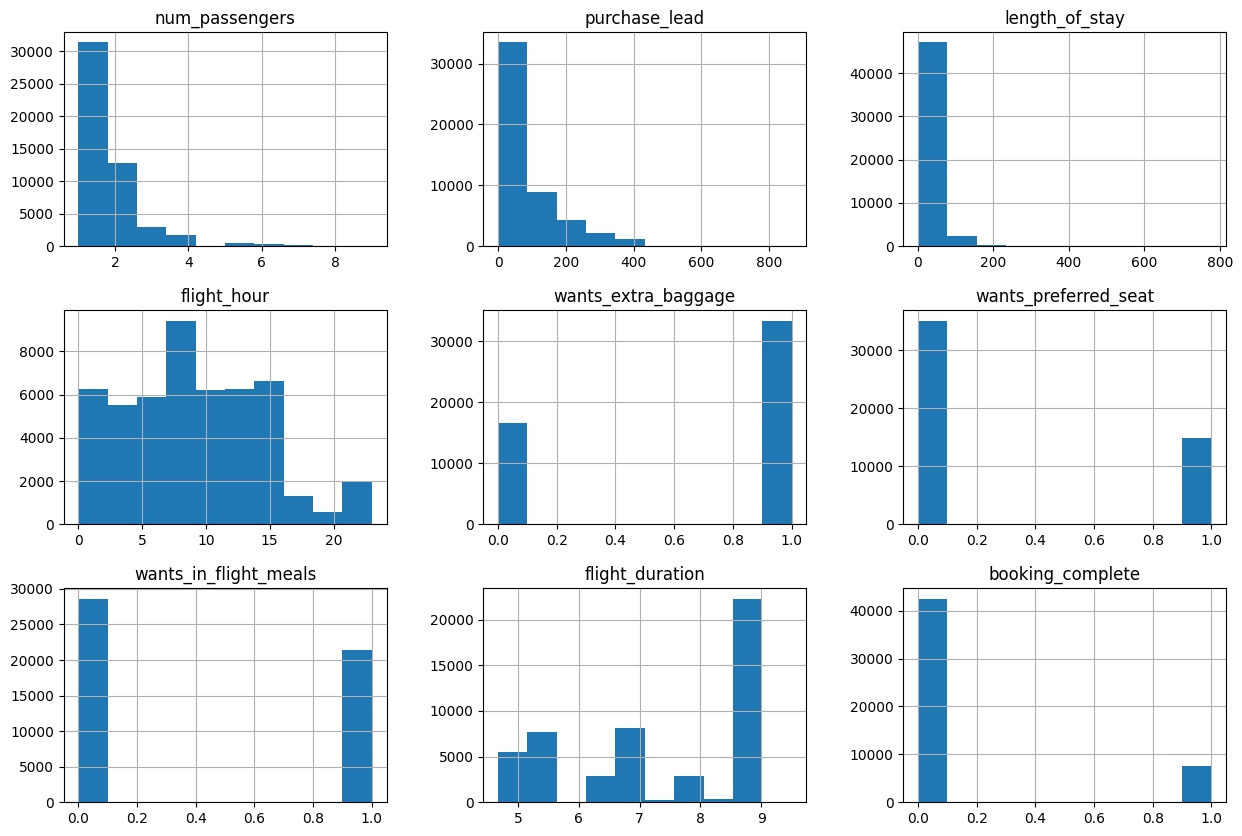

In [31]:
import matplotlib.pyplot as plt

# Histograms for numerical features
df.hist(bins=10, figsize=(15, 10))
plt.savefig('fig_1', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# flight_hour_bins = [0, 6, 12, 18, 24]
# flight_hour_labels = ['Early Morning', 'Morning', 'Afternoon', 'Night']

# df['flight_hour_binned'] = pd.cut(df['flight_hour'], bins = flight_hour_bins, labels = flight_hour_labels, right=False)

# df

def time_of_day_label(hour):
    if 5 <= hour < 8:
        return 'early_morning'
    elif 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Step 2: Apply function to create a new column
df['time_of_day'] = df['flight_hour'].apply(time_of_day_label)

# Show results
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,time_of_day
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,early_morning
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,night
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,evening
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,night
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,morning
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,night
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,night
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,morning


In [10]:
# One-hot encode the new categorical columns
df_encoded = pd.get_dummies(df, columns=['time_of_day', 'flight_day'], dtype='uint8')
print(df_encoded.columns.tolist())


['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete', 'time_of_day_afternoon', 'time_of_day_early_morning', 'time_of_day_evening', 'time_of_day_morning', 'time_of_day_night', 'flight_day_Fri', 'flight_day_Mon', 'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue', 'flight_day_Wed']


In [11]:
df_encoded

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,...,time_of_day_evening,time_of_day_morning,time_of_day_night,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,Internet,RoundTrip,262,19,7,AKLDEL,New Zealand,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,Internet,RoundTrip,112,20,3,AKLDEL,New Zealand,0,0,...,0,0,1,0,0,1,0,0,0,0
2,2,Internet,RoundTrip,243,22,17,AKLDEL,India,1,1,...,1,0,0,0,0,0,0,0,0,1
3,1,Internet,RoundTrip,96,31,4,AKLDEL,New Zealand,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2,Internet,RoundTrip,68,22,15,AKLDEL,India,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,PERPNH,Australia,1,0,...,0,1,0,0,0,1,0,0,0,0
49996,1,Internet,RoundTrip,111,6,4,PERPNH,Australia,0,0,...,0,0,1,0,0,0,1,0,0,0
49997,1,Internet,RoundTrip,24,6,22,PERPNH,Australia,0,0,...,0,0,1,0,0,1,0,0,0,0
49998,1,Internet,RoundTrip,15,6,11,PERPNH,Australia,1,0,...,0,1,0,0,1,0,0,0,0,0


In [12]:
df_encoded = df_encoded.drop(columns=['length_of_stay', 'route', 'num_passengers'])

In [13]:
df_encoded

,sales_channel,trip_type,purchase_lead,flight_hour,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,time_of_day_evening,time_of_day_morning,time_of_day_night,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,Internet,RoundTrip,262,7,New Zealand,1,0,0,5.52,0,...,0,0,0,0,0,1,0,0,0,0
1,Internet,RoundTrip,112,3,New Zealand,0,0,0,5.52,0,...,0,0,1,0,0,1,0,0,0,0
2,Internet,RoundTrip,243,17,India,1,1,0,5.52,0,...,1,0,0,0,0,0,0,0,0,1
3,Internet,RoundTrip,96,4,New Zealand,0,0,1,5.52,0,...,0,0,1,0,0,1,0,0,0,0
4,Internet,RoundTrip,68,15,India,1,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Internet,RoundTrip,27,9,Australia,1,0,1,5.62,0,...,0,1,0,0,0,1,0,0,0,0
49996,Internet,RoundTrip,111,4,Australia,0,0,0,5.62,0,...,0,0,1,0,0,0,1,0,0,0
49997,Internet,RoundTrip,24,22,Australia,0,0,1,5.62,0,...,0,0,1,0,0,1,0,0,0,0
49998,Internet,RoundTrip,15,11,Australia,1,0,1,5.62,0,...,0,1,0,0,1,0,0,0,0,0


In [14]:
df_encoded = df_encoded.drop(columns=['flight_hour'])

In [15]:
df_encoded

,sales_channel,trip_type,purchase_lead,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,time_of_day_afternoon,...,time_of_day_evening,time_of_day_morning,time_of_day_night,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,Internet,RoundTrip,262,New Zealand,1,0,0,5.52,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Internet,RoundTrip,112,New Zealand,0,0,0,5.52,0,0,...,0,0,1,0,0,1,0,0,0,0
2,Internet,RoundTrip,243,India,1,1,0,5.52,0,0,...,1,0,0,0,0,0,0,0,0,1
3,Internet,RoundTrip,96,New Zealand,0,0,1,5.52,0,0,...,0,0,1,0,0,1,0,0,0,0
4,Internet,RoundTrip,68,India,1,0,1,5.52,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Internet,RoundTrip,27,Australia,1,0,1,5.62,0,0,...,0,1,0,0,0,1,0,0,0,0
49996,Internet,RoundTrip,111,Australia,0,0,0,5.62,0,0,...,0,0,1,0,0,0,1,0,0,0
49997,Internet,RoundTrip,24,Australia,0,0,1,5.62,0,0,...,0,0,1,0,0,1,0,0,0,0
49998,Internet,RoundTrip,15,Australia,1,0,1,5.62,0,0,...,0,1,0,0,1,0,0,0,0,0


In [16]:
df_encoded = pd.get_dummies(df_encoded, columns=['trip_type', 'sales_channel', 'booking_origin'], dtype='uint8')

In [17]:
df_encoded

,purchase_lead,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,time_of_day_afternoon,time_of_day_early_morning,time_of_day_evening,time_of_day_morning,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,262,1,0,0,5.52,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,112,0,0,0,5.52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,243,1,1,0,5.52,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,96,0,0,1,5.52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68,1,0,1,5.52,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,27,1,0,1,5.62,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49996,111,0,0,0,5.62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,24,0,0,1,5.62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,15,1,0,1,5.62,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
print(df_encoded.columns.tolist())

['purchase_lead', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete', 'time_of_day_afternoon', 'time_of_day_early_morning', 'time_of_day_evening', 'time_of_day_morning', 'time_of_day_night', 'flight_day_Fri', 'flight_day_Mon', 'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue', 'flight_day_Wed', 'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip', 'sales_channel_Internet', 'sales_channel_Mobile', 'booking_origin_(not set)', 'booking_origin_Afghanistan', 'booking_origin_Algeria', 'booking_origin_Argentina', 'booking_origin_Australia', 'booking_origin_Austria', 'booking_origin_Bahrain', 'booking_origin_Bangladesh', 'booking_origin_Belarus', 'booking_origin_Belgium', 'booking_origin_Bhutan', 'booking_origin_Brazil', 'booking_origin_Brunei', 'booking_origin_Bulgaria', 'booking_origin_Cambodia', 'booking_origin_Canada', 'booking_origin_Chile', 'booking_origin_China', 'booking_origin_Colombia', 'book

In [19]:
#Importing essential libraries
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [20]:
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']

In [21]:
#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)

In [22]:
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')

In [23]:
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)

In [24]:
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Mean f1: 0.886
Mean recall: 0.879
Mean precision: 0.893


In [25]:
#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [26]:
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)

In [28]:
#Create confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4194   58]
 [  74  674]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4252
           1       0.92      0.90      0.91       748

    accuracy                           0.97      5000
   macro avg       0.95      0.94      0.95      5000
weighted avg       0.97      0.97      0.97      5000



<Figure size 200x100 with 0 Axes>

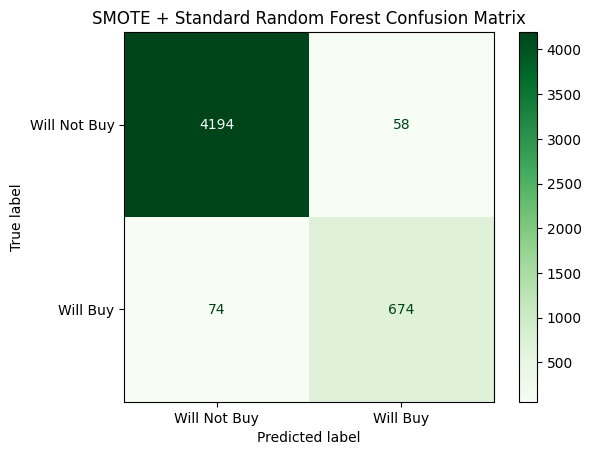

In [44]:
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Will Not Buy', 'Will Buy'])

# Plot the confusion matrix
plt.figure(figsize=(2, 1))
disp.plot(cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.savefig('fig_2', dpi=300, bbox_inches='tight')
plt.show()

<Axes: >

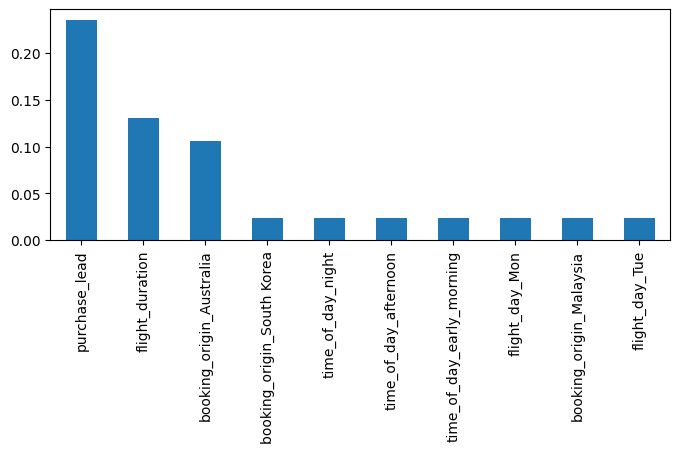

In [37]:
feature_importances = pd.Series(SMOTE_SRF.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
fig = feature_importances.head(10).plot.bar(figsize=(8, 3))

plt.savefig('fig_new', dpi=300, bbox_inches='tight')

fig